In [ ]:
#mounting drive to access the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imorting the libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
import os
import scipy.optimize as opt
from sklearn import preprocessing #data visualization

# Loading data set

In [ ]:
path = "/content/drive/MyDrive/FDM_MiniProject/housepricing.csv"
df = pd.read_csv(path)
df.columns



Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [ ]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN



# Data Exploration and Analysis

In [ ]:
#provides a concise summary of the DataFrame's structure and information. This method typically displays the following information:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [ ]:
#provides a xolumns and rows
df.shape
#33656 records with 19 columns

(33656, 19)

### Histograms for analysis

array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDROOMS'}>,
        <Axes: title={'center': 'BATHROOMS'}>,
        <Axes: title={'center': 'GARAGE'}>],
       [<Axes: title={'center': 'LAND_AREA'}>,
        <Axes: title={'center': 'FLOOR_AREA'}>,
        <Axes: title={'center': 'BUILD_YEAR'}>,
        <Axes: title={'center': 'CBD_DIST'}>],
       [<Axes: title={'center': 'NEAREST_STN_DIST'}>,
        <Axes: title={'center': 'POSTCODE'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>],
       [<Axes: title={'center': 'NEAREST_SCH_DIST'}>,
        <Axes: title={'center': 'NEAREST_SCH_RANK'}>, <Axes: >, <Axes: >]],
      dtype=object)

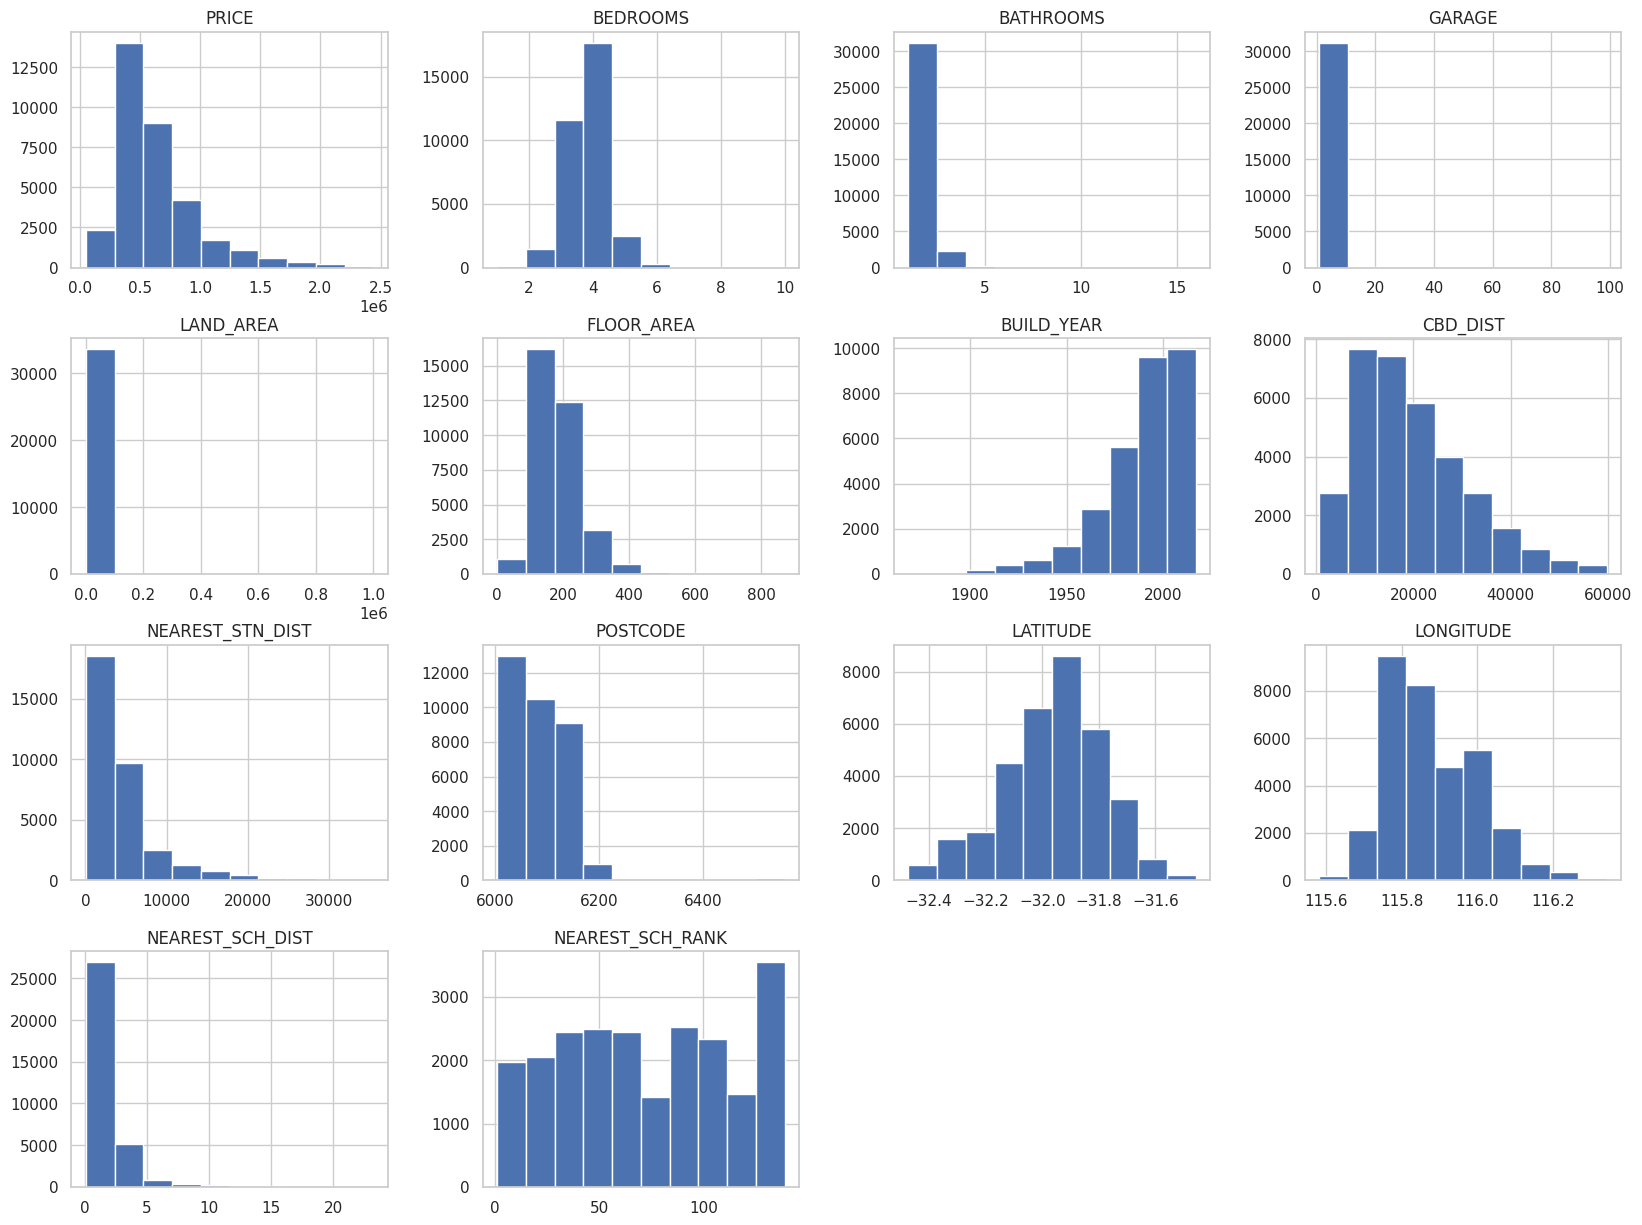

In [ ]:
df.hist(figsize=(20,15))

### Correlation Analysis

In [ ]:
#calculate the correlation between columns (variables) in a DataFrame. It computes the pairwise correlation between all numeric columns by default and returns a correlation matrix.
# This correlation matrix provides insights into how closely related variables are to each other
df.corr()

<ipython-input-8-ea96ba2cd4d9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
PRICE,1.000000,0.252637,0.377133,0.134343,0.056855,0.548497,-0.157218,-0.354327,-0.095089,-0.171553,0.053041,-0.183734,-0.021941,-0.461991
BEDROOMS,0.252637,1.000000,0.555702,0.194197,0.051223,0.536926,0.229019,0.124654,0.102203,0.010601,0.021967,-0.015170,0.092391,0.024461
BATHROOMS,0.377133,0.555702,1.000000,0.186801,0.027059,0.555843,0.339594,0.033053,0.037068,-0.041374,0.051411,-0.093817,0.060734,-0.096024
GARAGE,0.134343,0.194197,0.186801,1.000000,0.059211,0.201541,0.040371,0.046244,0.110527,0.028005,-0.016416,0.091270,0.099654,0.021863
LAND_AREA,0.056855,0.051223,0.027059,0.059211,1.000000,0.073836,0.002063,0.133262,0.233023,0.042070,-0.014389,0.151255,0.286964,0.048758
FLOOR_AREA,0.548497,0.536926,0.555843,0.201541,0.073836,1.000000,0.226872,0.022687,0.106527,-0.050658,0.043555,-0.046625,0.120048,-0.145502
BUILD_YEAR,-0.157218,0.229019,0.339594,0.040371,0.002063,0.226872,1.000000,0.270110,0.103350,0.044095,0.045463,-0.059047,0.108719,0.158639
CBD_DIST,-0.354327,0.124654,0.033053,0.046244,0.133262,0.022687,0.270110,1.000000,0.446496,0.255801,-0.196813,-0.060097,0.377118,0.328703
NEAREST_STN_DIST,-0.095089,0.102203,0.037068,0.110527,0.233023,0.106527,0.103350,0.446496,1.000000,0.204347,0.037174,0.496924,0.634712,0.189571
POSTCODE,-0.171553,0.010601,-0.041374,0.028005,0.042070,-0.050658,0.044095,0.255801,0.204347,1.000000,-0.642643,0.173918,0.128424,0.192768


# **HeatMap Analysis**

<ipython-input-9-045caab3caff>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax =1)


<Axes: >

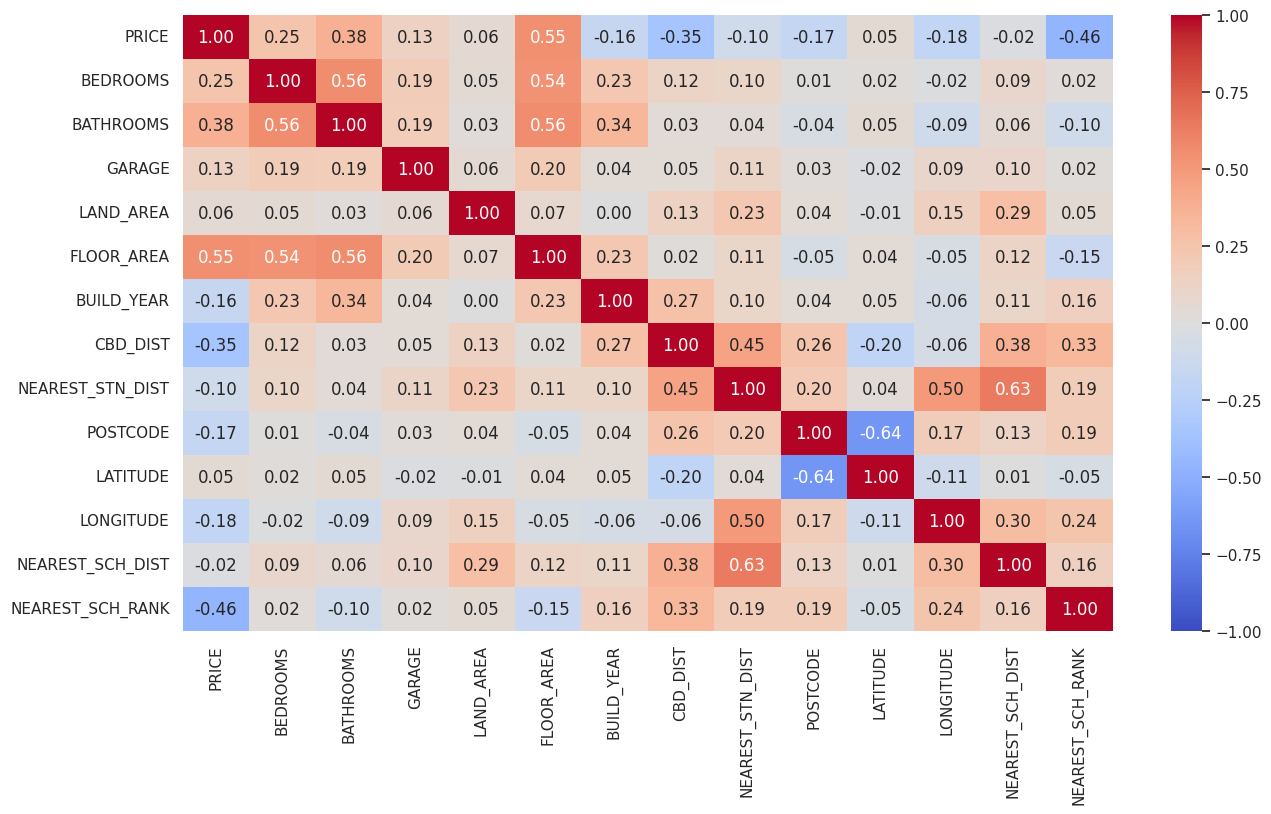

In [ ]:
#visually represent the relationships between variables in your data.

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax =1)

# Data Preprocessing

In [ ]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [ ]:
#Dropping the null values
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

# Handling Outliers

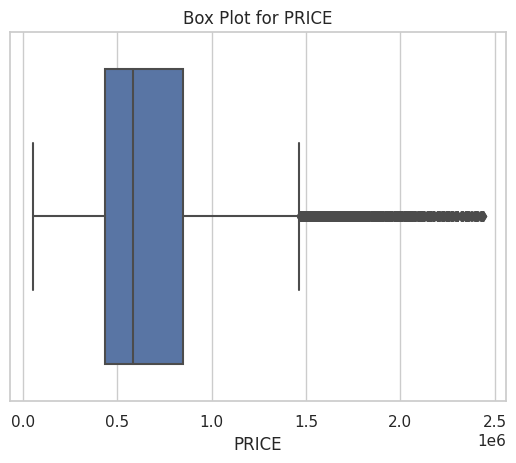

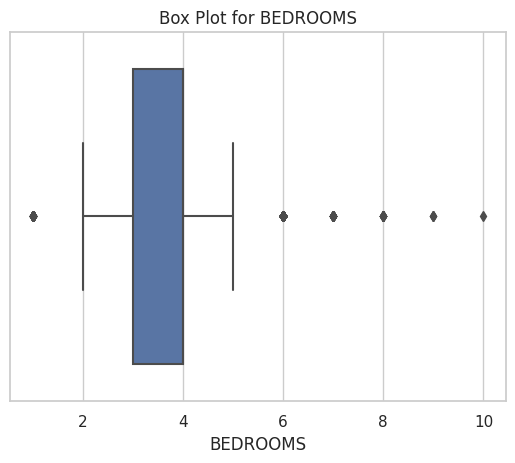

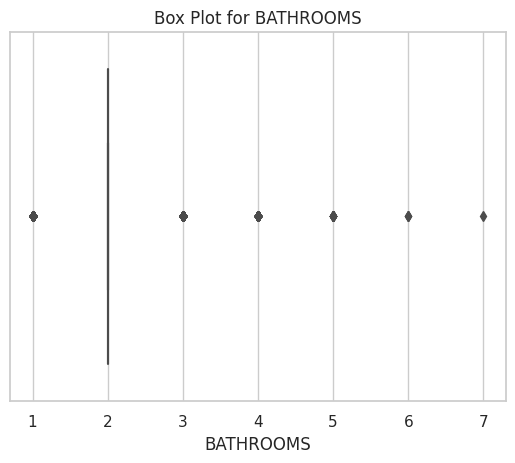

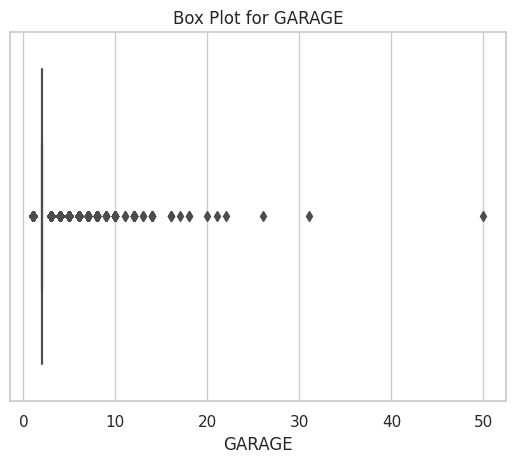

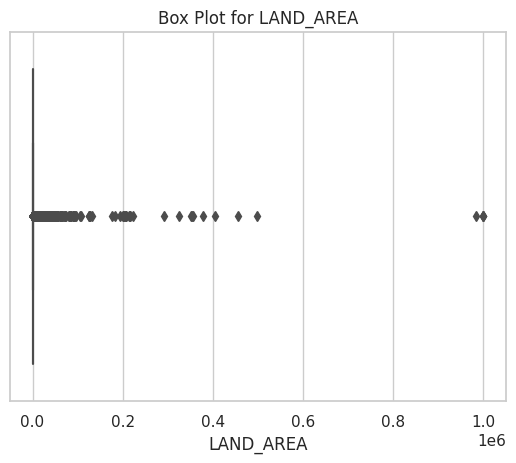

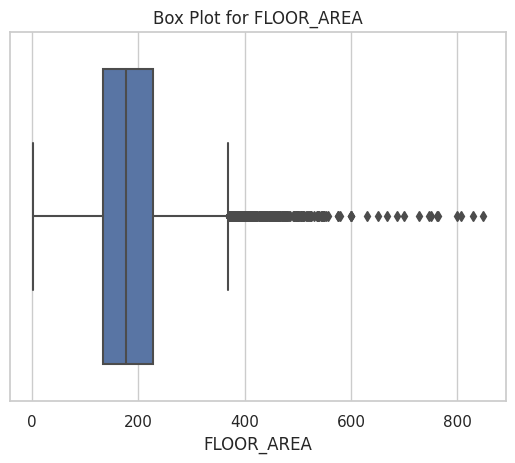

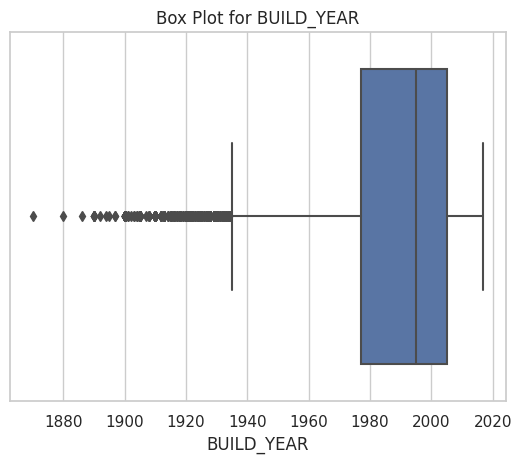

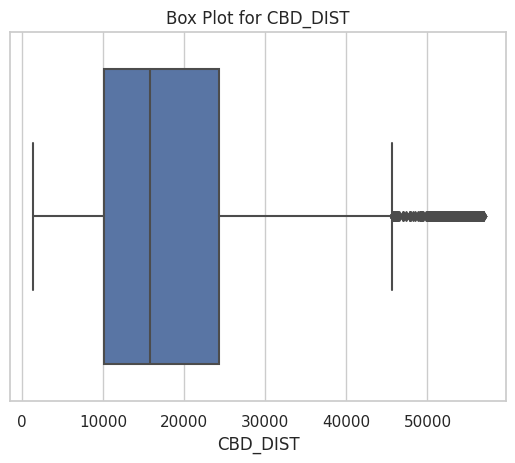

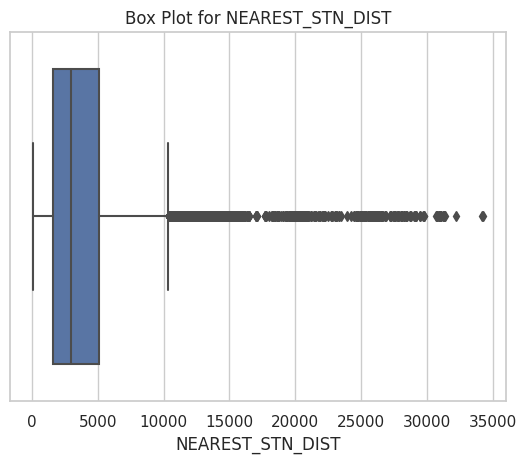

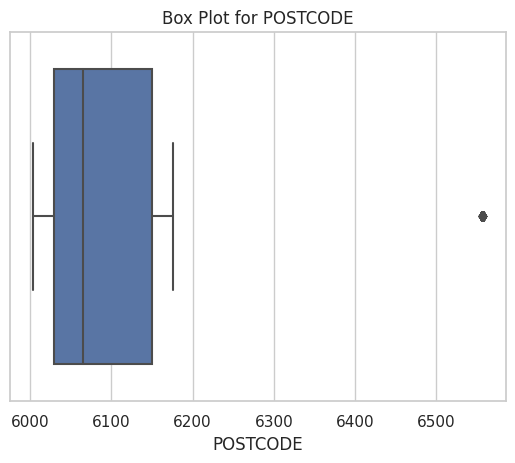

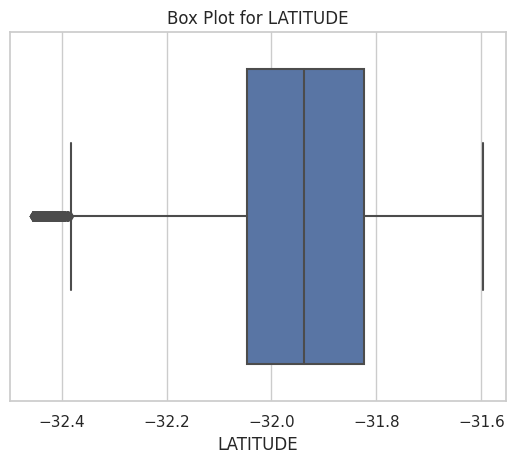

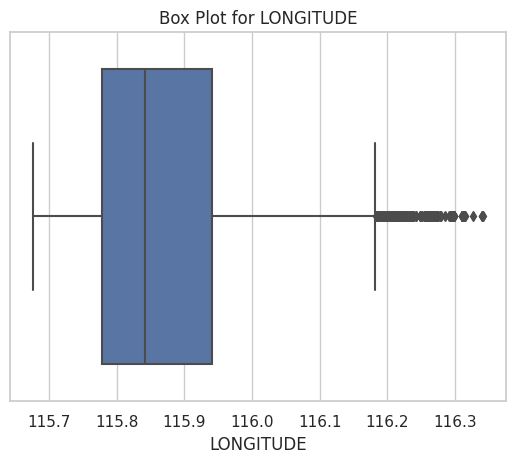

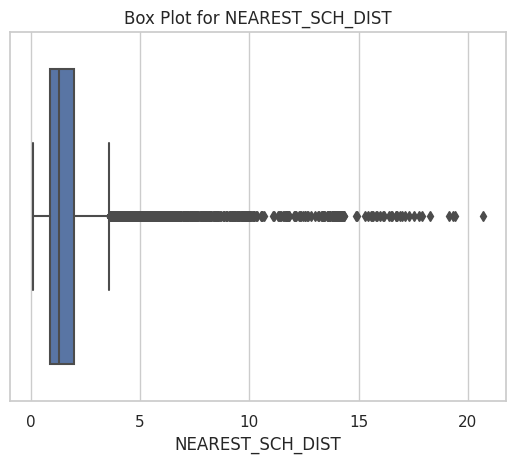

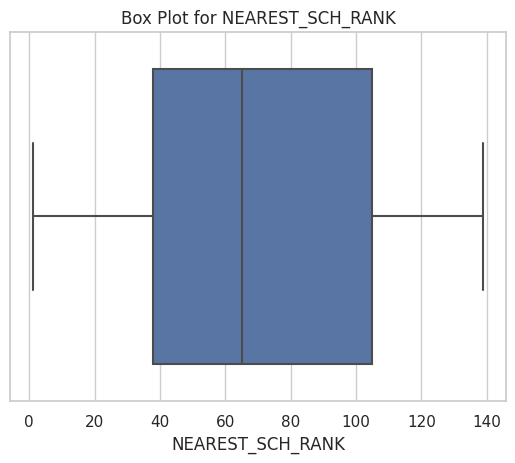

In [ ]:
# create box plots for each numerical column in a DataFrame.
# Box plots are a useful way to visualize the distribution and statistical summary of numerical data
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])


# Create box plots for each numerical column
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()



### Handling the outliers

In [ ]:
#generate descriptive statistics for a DataFrame, primarily for numerical columns
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,1.920800e+04,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000
mean,6.998658e+05,3.676020,1.861776,2.183205,2441.914879,187.532330,1988.922741,18327.112922,4188.389681,6086.237245,-31.949166,115.864546,1.684322,72.094492
std,3.872944e+05,0.750726,0.587704,1.221165,18446.099139,72.985315,21.907656,10937.511971,4172.353928,64.491313,0.167803,0.109222,1.570357,40.672225
min,5.200000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1870.000000,1300.000000,46.000000,6003.000000,-32.455550,115.675834,0.070912,1.000000
25%,4.380000e+05,3.000000,2.000000,2.000000,494.000000,134.000000,1977.000000,10100.000000,1600.000000,6030.000000,-32.047148,115.778941,0.866041,38.000000
50%,5.850000e+05,4.000000,2.000000,2.000000,675.000000,177.000000,1995.000000,15800.000000,3000.000000,6065.000000,-31.937099,115.842006,1.301665,65.000000
75%,8.500000e+05,4.000000,2.000000,2.000000,809.000000,228.000000,2005.000000,24300.000000,5100.000000,6150.000000,-31.823297,115.940476,1.957117,105.000000
max,2.440000e+06,10.000000,7.000000,50.000000,999999.000000,849.000000,2017.000000,56900.000000,34300.000000,6558.000000,-31.595910,116.341780,20.720911,139.000000


### Calculating Z -scores

In [ ]:
#Z-scores for each numerical column in a DataFrame and then creates a new DataFrame to store these Z-scores.
# Z-scores are a way to measure how many standard deviations a data point is away from the mean. They are often used for identifying outliers in a dataset
from scipy import stats
# Calculate Z-scores for each numerical column
z_scores = np.abs(stats.zscore(numerical_columns))

# Create an empty DataFrame to store Z-scores
z_scores_df = pd.DataFrame(data=z_scores, columns=numerical_columns.columns)

In [ ]:
z_scores_df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000
mean,0.746710,0.813036,0.701586,0.522036,0.177779,0.770056,0.772130,0.792745,0.669392,0.801511,0.795536,0.807984,0.584846,0.879327
std,0.665167,0.582228,0.712604,0.852945,0.984096,0.637993,0.635481,0.609570,0.742928,0.597995,0.605923,0.589220,0.811165,0.476231
min,0.000344,0.431566,0.235199,0.150029,0.000005,0.006408,0.003527,0.002479,0.002783,0.034692,0.000262,0.000057,0.000047,0.026911
25%,0.334033,0.431566,0.235199,0.150029,0.091237,0.322434,0.368705,0.354101,0.266430,0.383980,0.337369,0.400260,0.222605,0.469485
50%,0.598697,0.431566,0.235199,0.150029,0.098935,0.651276,0.681183,0.669924,0.524511,0.918555,0.654031,0.746463,0.434119,0.813709
75%,0.929896,0.900512,1.466383,0.968940,0.107989,1.061442,0.962121,1.053934,0.788937,1.066261,1.114773,1.075509,0.689621,1.354633
max,4.493170,8.424034,8.743107,39.157736,54.080976,9.063260,5.428506,3.526752,7.217124,7.315327,3.017812,4.369488,12.122774,1.748032


In [ ]:
# Define a threshold to identify outliers
threshold = 3

# Find and mark outliers
outliers = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to remove outliers
df = df[~outliers]

In [ ]:
df.shape

(16768, 19)

array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDROOMS'}>,
        <Axes: title={'center': 'BATHROOMS'}>,
        <Axes: title={'center': 'GARAGE'}>],
       [<Axes: title={'center': 'LAND_AREA'}>,
        <Axes: title={'center': 'FLOOR_AREA'}>,
        <Axes: title={'center': 'BUILD_YEAR'}>,
        <Axes: title={'center': 'CBD_DIST'}>],
       [<Axes: title={'center': 'NEAREST_STN_DIST'}>,
        <Axes: title={'center': 'POSTCODE'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>],
       [<Axes: title={'center': 'NEAREST_SCH_DIST'}>,
        <Axes: title={'center': 'NEAREST_SCH_RANK'}>, <Axes: >, <Axes: >]],
      dtype=object)

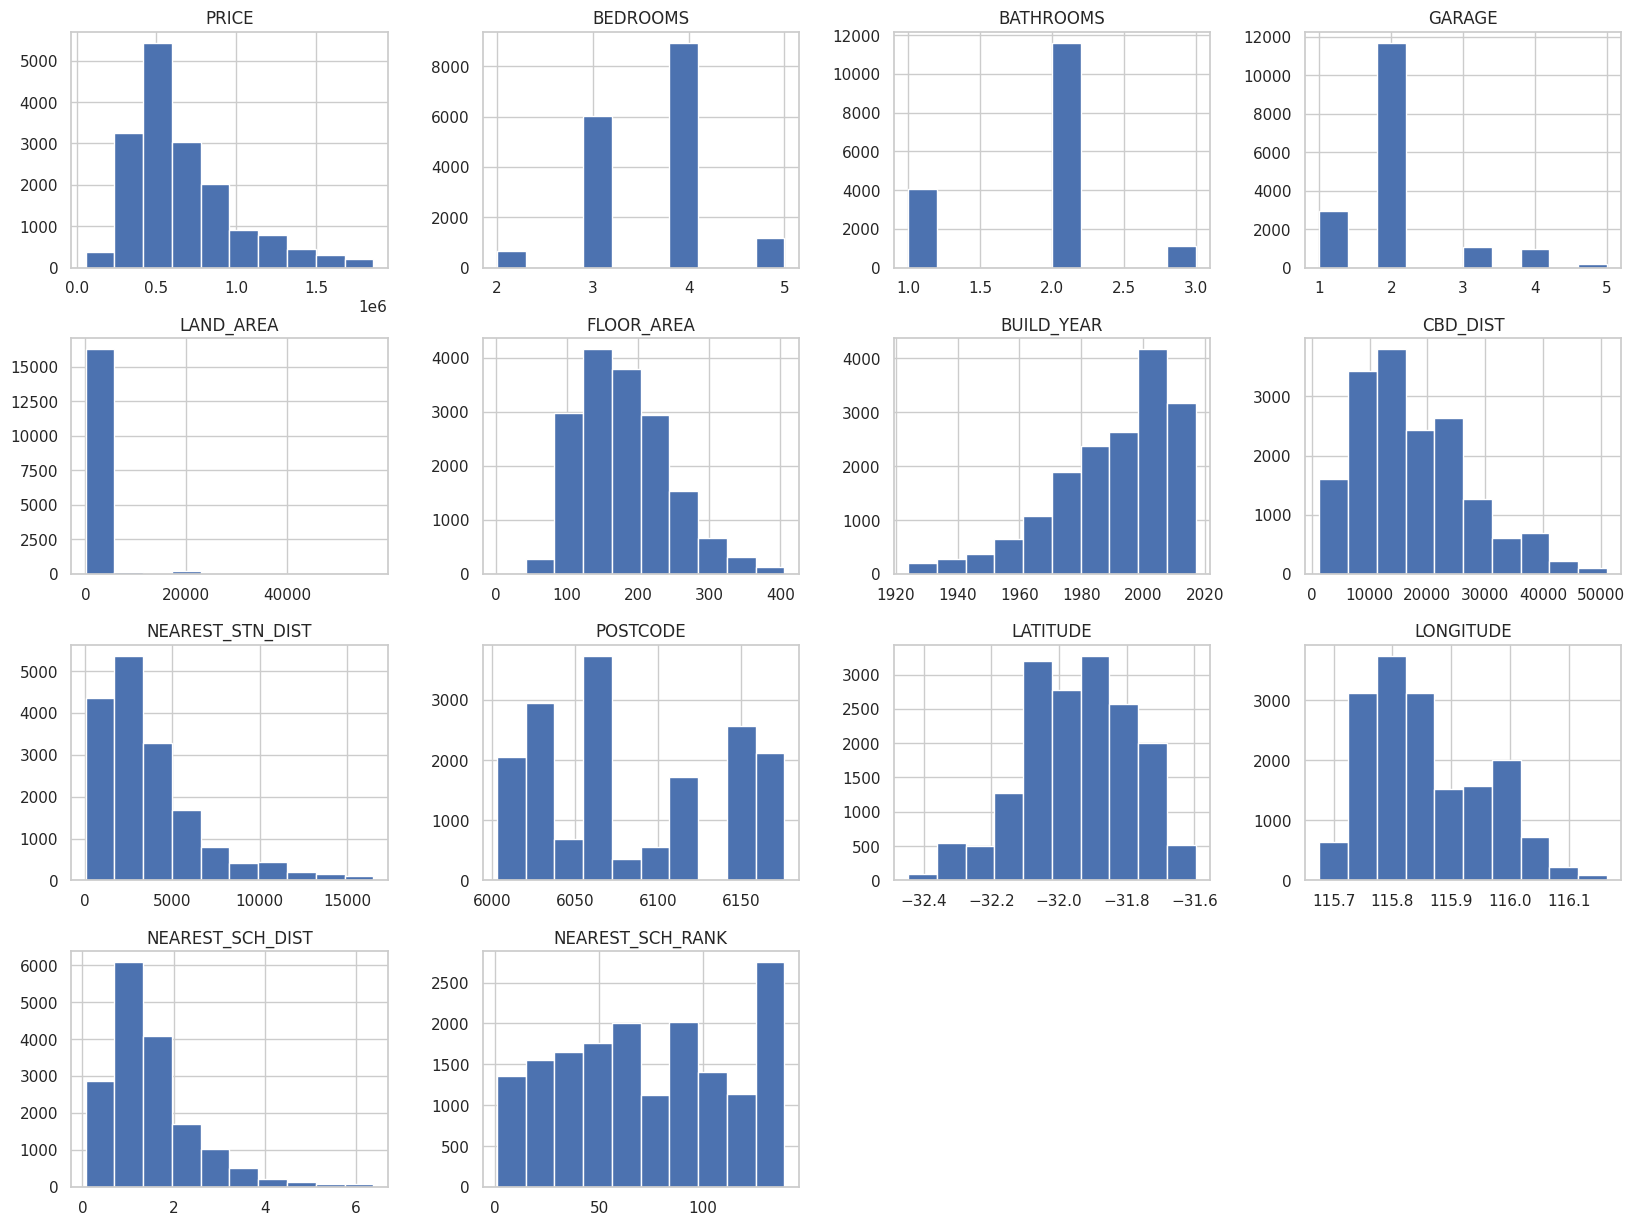

In [ ]:
df.hist(figsize=(20,15))

## Applying transformation

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Copy of Data frame created becasue a warning was given
df_copy = df.copy()
'''
df_copy['BEDROOMS'] = np.log1p(df_copy['BEDROOMS'])
df_copy['BATHROOMS'] = np.log1p(df_copy['BATHROOMS'])
df_copy['GARAGE'] = np.log1p(df_copy['GARAGE'])
df_copy['NEAREST_STN_DIST'] = np.log1p(df_copy['NEAREST_STN_DIST'])
df_copy['POSTCODE'] = np.log1p(df_copy['POSTCODE'])
df_copy['NEAREST_SCH_DIST'] = np.log1p(df_copy['NEAREST_SCH_DIST'])
'''

array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDROOMS'}>,
        <Axes: title={'center': 'BATHROOMS'}>,
        <Axes: title={'center': 'GARAGE'}>],
       [<Axes: title={'center': 'LAND_AREA'}>,
        <Axes: title={'center': 'FLOOR_AREA'}>,
        <Axes: title={'center': 'BUILD_YEAR'}>,
        <Axes: title={'center': 'CBD_DIST'}>],
       [<Axes: title={'center': 'NEAREST_STN_DIST'}>,
        <Axes: title={'center': 'POSTCODE'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>],
       [<Axes: title={'center': 'NEAREST_SCH_DIST'}>,
        <Axes: title={'center': 'NEAREST_SCH_RANK'}>, <Axes: >, <Axes: >]],
      dtype=object)

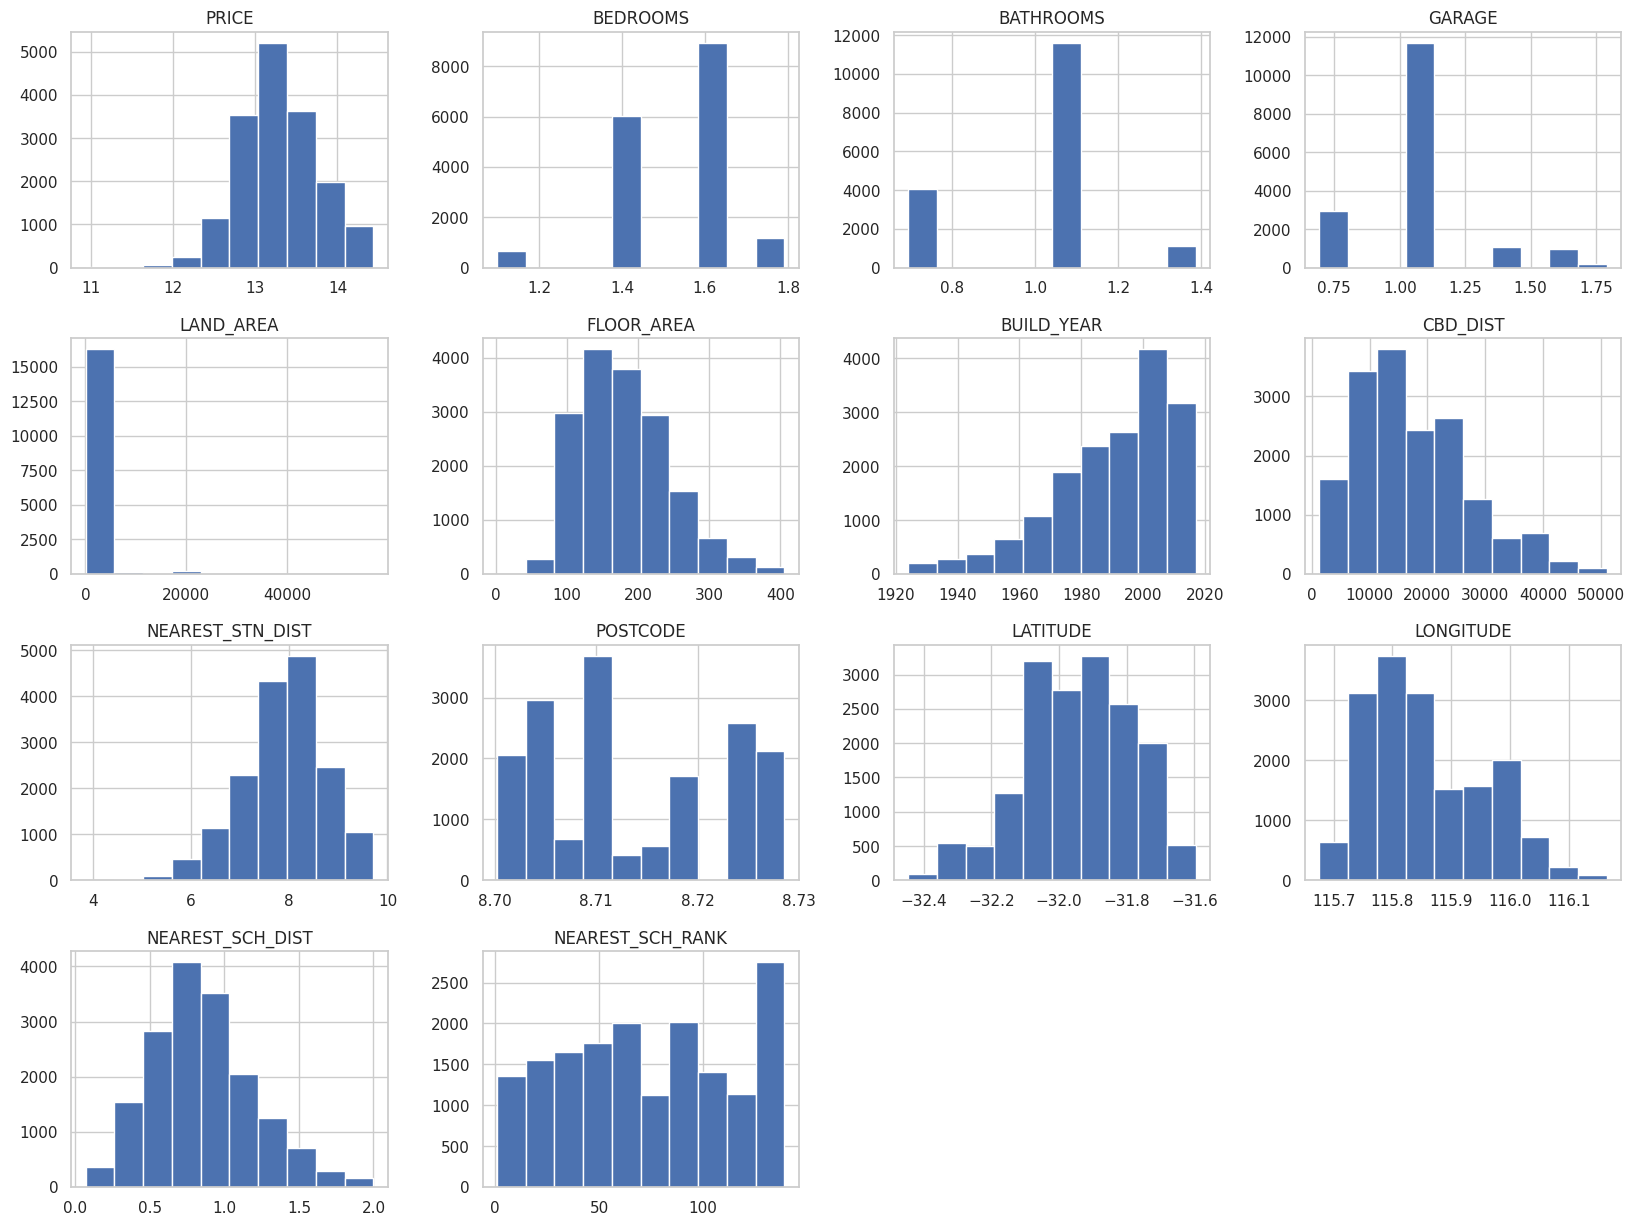

In [ ]:
df_copy.hist(figsize=(20,15))

In [ ]:
#see all the categorical data with each of their unique values
categorical_columns = df_copy.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df_copy[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'ADDRESS':
['1 Addis Way' '1 Ainsley Court' '1 Ashcott Gate' ... '9B Viveash Road'
 '9b Wesley Street' '9C Gold Street']


Unique values in 'SUBURB':
['Wandi' 'Camillo' 'Butler' 'Hammond Park' 'Bull Creek' 'Maida Vale'
 'Forrestdale' 'Atwell' 'Ashby' 'Glen Forrest' 'Secret Harbour'
 'Herne Hill' 'Gwelup' 'Harrisdale' 'North Fremantle' 'Quinns Rocks'
 'Parkwood' 'Tapping' 'Thornlie' 'Baldivis' 'Hamilton Hill' 'Menora'
 'Southern River' 'Swanbourne' 'The Vines' 'North Beach' 'Madeley'
 'Wembley Downs' 'Manning' 'Queens Park' 'Medina' 'Aubin Grove'
 'Karrinyup' 'Gooseberry Hill' 'Darch' 'Hillarys' 'Alexander Heights'
 'Ardross' 'Success' 'Bateman' 'Orelia' 'Edgewater' 'East Cannington'
 'Marmion' 'Maddington' 'Mount Claremont' 'Iluka' 'Ballajura'
 'Salter Point' 'Byford' 'Willagee' 'Mullaloo' 'Woodlands' 'Rossmoyne'
 'Wembley' 'Brentwood' 'Carine' 'Hillman' 'Aveley' 'Warnbro'
 'Osborne Park' 'Woodbridge' 'Darlington' 'Huntingdale' 'Balcatta'
 'Merriwa' 'Kwinana Town Centr

In [ ]:
#dropping categorical columns
columns_to_keep = ["DATE_SOLD", "SUBURB"]
categorical_columns = df_copy.select_dtypes(include=['object']).columns

# Drop categorical columns except the specified ones
columns_to_drop = [col for col in categorical_columns if col not in columns_to_keep]
df_copy = df_copy.drop(columns=columns_to_drop)

In [ ]:
categorical_columns = df_copy.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df_copy[column].value_counts()
    print(f"Unique values and their counts in '{column}':")
    print(unique_values)
    print("\n")

Unique values and their counts in 'SUBURB':
Henley Brook       182
Darch              180
Iluka              178
Butler             175
Huntingdale        168
                  ... 
Greenmount           2
Bennett Springs      2
Stoneville           1
Nollamara            1
Girrawheen           1
Name: SUBURB, Length: 261, dtype: int64


Unique values and their counts in 'DATE_SOLD':
10-2020\r    323
09-2020\r    321
07-2019\r    307
11-2018\r    298
05-2018\r    291
            ... 
01-2002\r      1
11-2000\r      1
12-1993\r      1
08-2001\r      1
10-1990\r      1
Name: DATE_SOLD, Length: 272, dtype: int64




### **Categorical varaible transformation**

In [ ]:
#encoding the suburd
suburb_counts = df_copy['SUBURB'].value_counts().to_dict()
df_copy['SUBURB_COUNT'] = df_copy['SUBURB'].map(suburb_counts)

df_copy.drop(columns=['SUBURB'], inplace=True)

In [ ]:
#Convert 'DATE_SOLD' to datetime
df_copy['DATE_SOLD'] = pd.to_datetime(df_copy['DATE_SOLD'])

#Extract year and month as new numeric features
df_copy['SOLD_YEAR'] = df_copy['DATE_SOLD'].dt.year

#Drop the original 'DATE_SOLD' column
df_copy.drop(columns=['DATE_SOLD'], inplace=True)

In [ ]:
# Specify the file path and name for the Excel file
excel_file_path = "/content/drive/MyDrive/FDM_MiniProject/cleared8.xlsx"  # Replace with the desired file path and name

# Use the to_excel method to save the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16768 entries, 1 to 33651
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRICE             16768 non-null  float64
 1   BEDROOMS          16768 non-null  float64
 2   BATHROOMS         16768 non-null  float64
 3   GARAGE            16768 non-null  float64
 4   LAND_AREA         16768 non-null  int64  
 5   FLOOR_AREA        16768 non-null  int64  
 6   BUILD_YEAR        16768 non-null  float64
 7   CBD_DIST          16768 non-null  int64  
 8   NEAREST_STN_DIST  16768 non-null  float64
 9   POSTCODE          16768 non-null  float64
 10  LATITUDE          16768 non-null  float64
 11  LONGITUDE         16768 non-null  float64
 12  NEAREST_SCH_DIST  16768 non-null  float64
 13  NEAREST_SCH_RANK  16768 non-null  float64
 14  SUBURB_COUNT      16768 non-null  int64  
 15  SOLD_YEAR         16768 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 2

### **Scaling and Normalizing Data**

In [ ]:
#Scaling and normalizing data
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST',
                     'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SUBURB_COUNT', 'SOLD_YEAR',]

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_copy[columns_to_scale] = scaler.fit_transform(df_copy[columns_to_scale])

<Axes: >

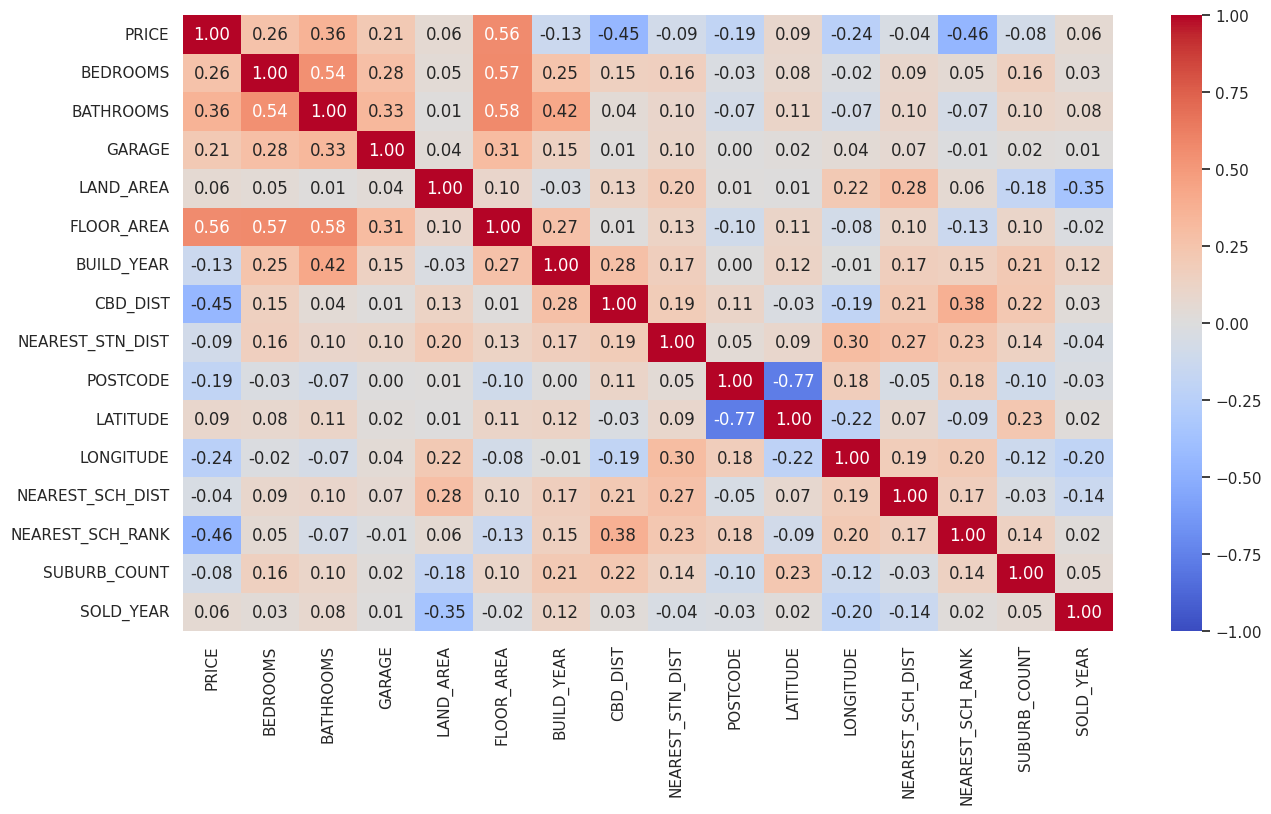

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df_copy.corr(),  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax =1)

# Creating new features

In [ ]:
#Create new feature BedroomToBathroomRatio
df_copy['BedroomToBathroomRatio'] = df_copy['BEDROOMS'] / df_copy['BATHROOMS']

# Creat new feature 'Price per Square Foot'
df_copy['Price_per_Square_Foot'] = df_copy['PRICE'] / df_copy['FLOOR_AREA']

<Axes: >

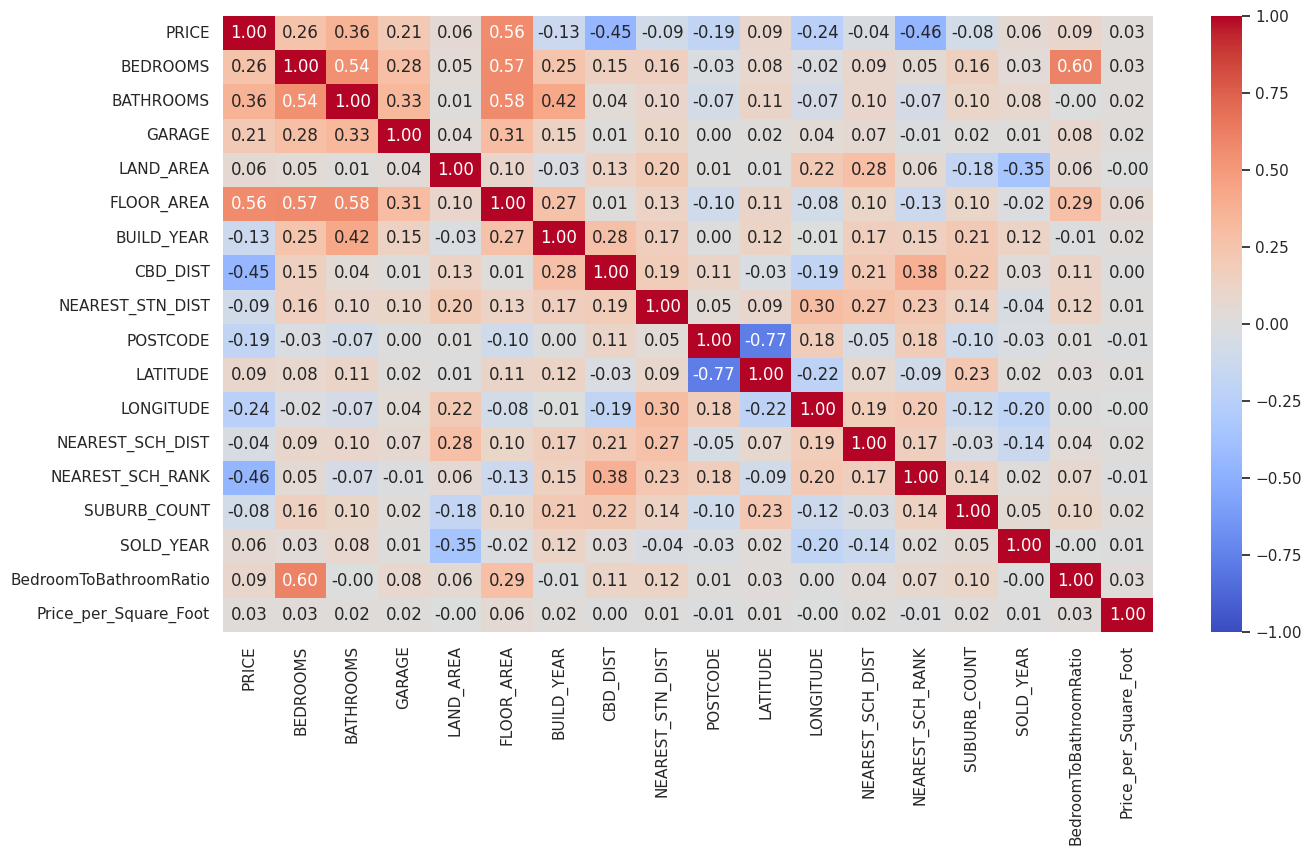

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df_copy.corr(),  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax =1)

# Feature Selection

### Random Forest

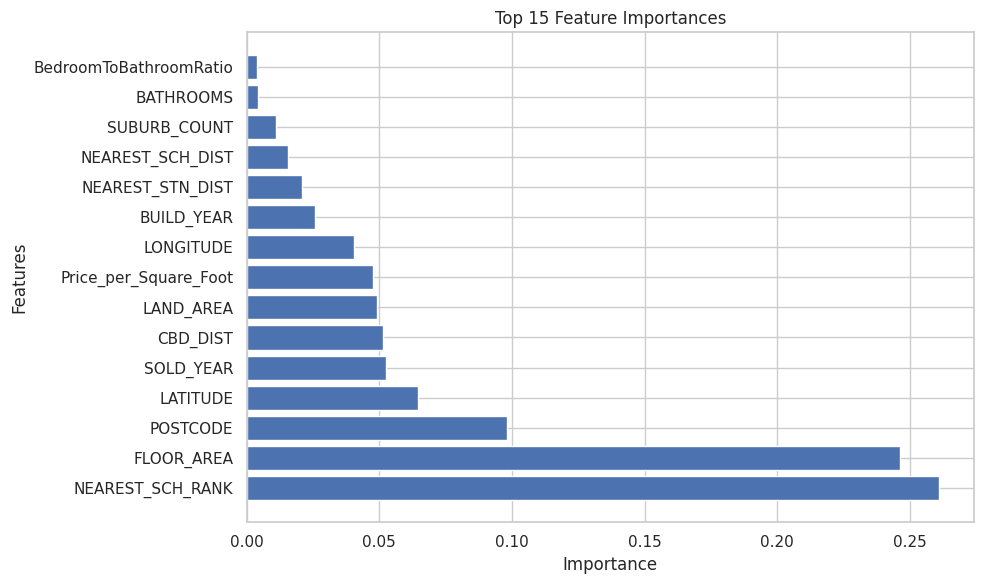

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np


X = df_copy.drop('PRICE', axis=1)  # Features
y = df_copy['PRICE']  # Target

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a dictionary of feature names and their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort features by importance (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top k important features
k = 15
selected_features = [feature for feature, importance in sorted_feature_importance[:k]]

# Create a horizontal bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), [importance for _, importance in sorted_feature_importance[:k]], tick_label=selected_features)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Top {} Feature Importances".format(k))
plt.tight_layout()
plt.show()


### XGBoost

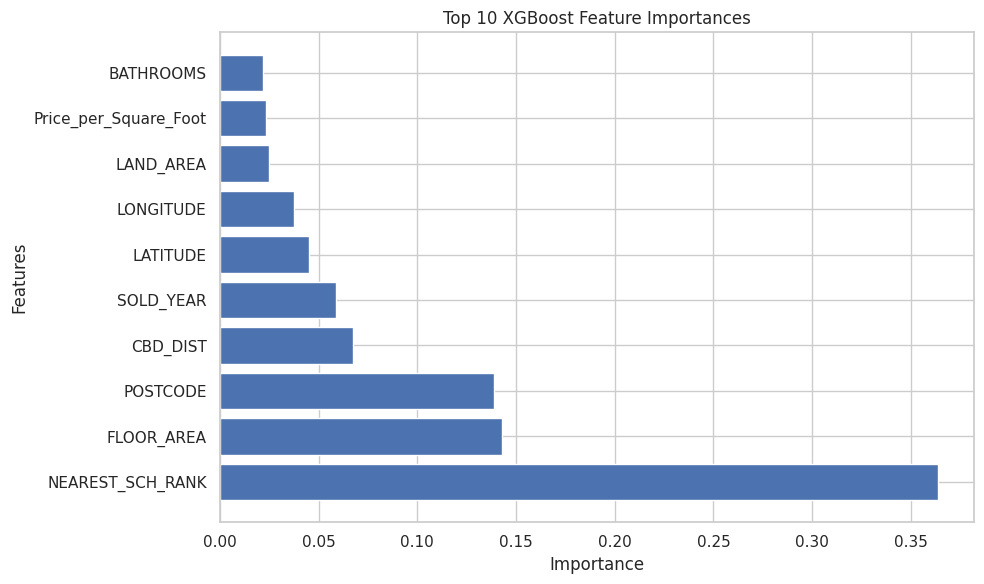

In [ ]:
import xgboost as xgb


xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

xgb_feature_importances = xgb_model.feature_importances_

xgb_feature_importance_dict = dict(zip(X.columns, xgb_feature_importances))

sorted_xgb_feature_importance = sorted(xgb_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

k = 10
selected_xgb_features = [feature for feature, importance in sorted_xgb_feature_importance[:k]]

# Create a horizontal bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_xgb_features)), [importance for _, importance in sorted_xgb_feature_importance[:k]], tick_label=selected_xgb_features)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Top {} XGBoost Feature Importances".format(k))
plt.tight_layout()
plt.show()


### Linear regression

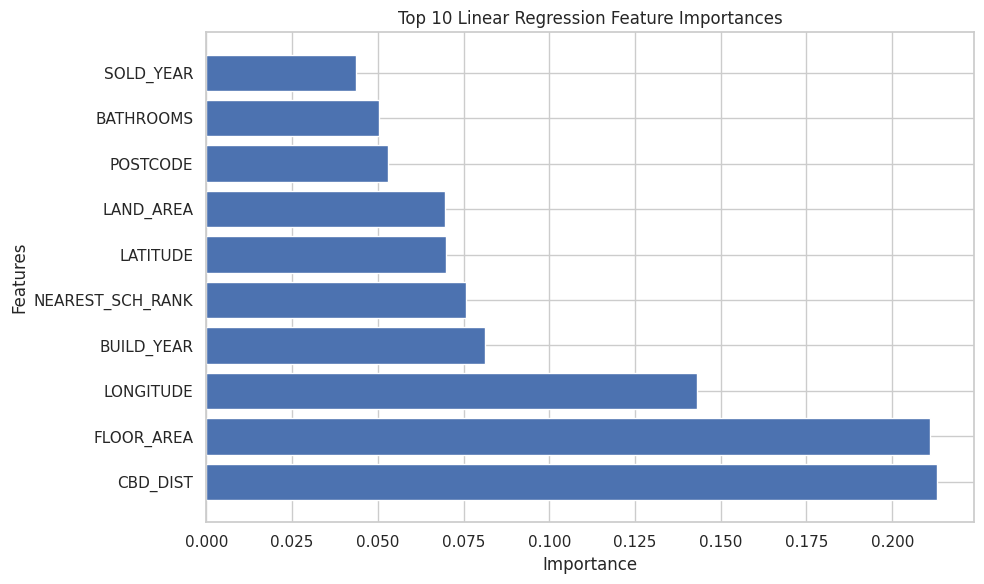

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X, y)

lr_feature_importances = np.abs(lr_model.coef_)

lr_feature_importance_dict = dict(zip(X.columns, lr_feature_importances))

sorted_lr_feature_importance = sorted(lr_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

k = 10
selected_lr_features = [feature for feature, importance in sorted_lr_feature_importance[:k]]

# Create a horizontal bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_lr_features)), [importance for _, importance in sorted_lr_feature_importance[:k]], tick_label=selected_lr_features)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Top {} Linear Regression Feature Importances".format(k))
plt.tight_layout()
plt.show()


Laso Regression

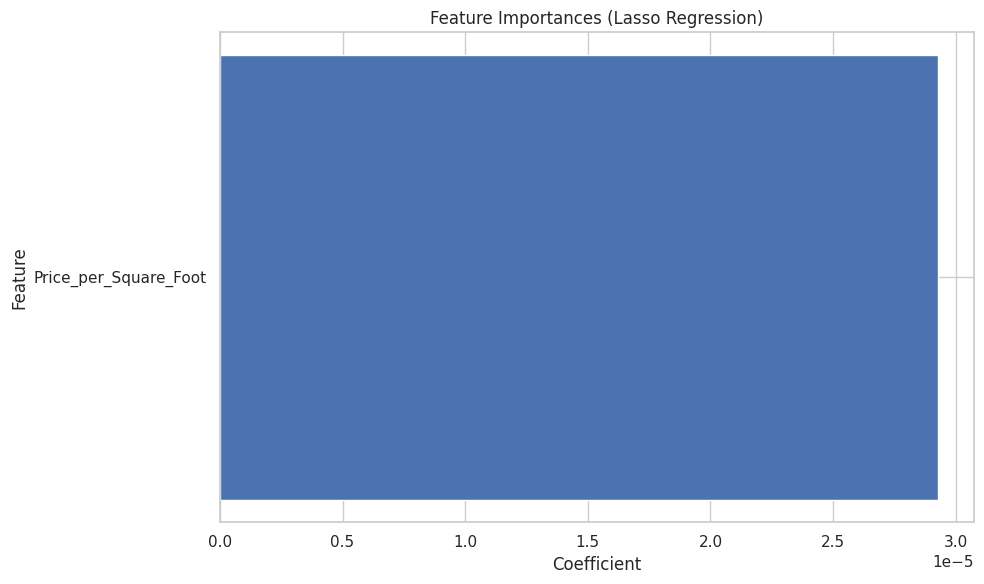

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'df_copy' contains your dataset and 'target_column' is your target variable
target_column = 'PRICE'  # Replace 'target' with the name of your target column

# Split the dataset into features (X) and the target variable (y)
X = df_copy.drop(target_column, axis=1)  # Exclude the target column
y = df_copy[target_column]

# Split the data into training and testing sets (optional, but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso Regression model
lasso = Lasso(alpha=1.0, random_state=42)  # Adjust alpha if needed

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

# Get feature importances (coefficients) from the Lasso model
feature_importances = lasso.coef_

# Create a DataFrame to hold feature names and their coefficients
feature_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_importances})

# Filter features with non-zero coefficients (selected features)
selected_features = feature_coefficients_df[feature_coefficients_df['Coefficient'] != 0]

# Sort selected features by coefficient value
selected_features = selected_features.sort_values(by='Coefficient', ascending=False)

# Create a horizontal bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features['Feature'], selected_features['Coefficient'])
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importances (Lasso Regression)")
plt.tight_layout()
plt.show()



In [ ]:
df_copy.shape

(15436, 18)

In [ ]:
# Specify the file path and name for the Excel file
excel_file_path = "/content/drive/MyDrive/FDM_MiniProject/cleared7.xlsx"  # Replace with the desired file path and name

# Use the to_excel method to save the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column

# Splitting data

In [ ]:
"""from sklearn.model_selection import train_test_split

X = df_copy[['SUBURB_COUNT', 'BEDROOMS', 'NEAREST_STN_DIST', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR',
             'SOLD_YEAR', 'POSTCODE', 'GARAGE', 'NEAREST_SCH_RANK', 'Price_per_Square_Foot',
             'LATITUDE','CBD_DIST','LONGITUDE']]
y = df_copy['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"""

"from sklearn.model_selection import train_test_split\n\nX = df_copy[['SUBURB_COUNT', 'BEDROOMS', 'NEAREST_STN_DIST', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR',\n             'SOLD_YEAR', 'POSTCODE', 'GARAGE', 'NEAREST_SCH_RANK', 'Price_per_Square_Foot',\n             'LATITUDE','CBD_DIST','LONGITUDE']]\ny = df_copy['PRICE']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"

In [ ]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
11,1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
13,1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0
15,1 August Court,Bull Creek,685000,3,2,3.0,706,196,1985.0,12500,Murdoch Station,961,11-2017\r,6149,-32.064580,115.860460,LEEMING SENIOR HIGH SCHOOL,1.183363,89.0


In [ ]:
from sklearn.model_selection import train_test_split

X = df_copy[['SUBURB_COUNT', 'BEDROOMS',  'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR',
              'BATHROOMS','Price_per_Square_Foot','NEAREST_SCH_RANK'
            ]]
y = df_copy['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Specify the file path and name for the Excel file
excel_file_path = "/content/drive/MyDrive/FDM_MiniProject/cleared8.xlsx"  # Replace with the desired file path and name

# Use the to_excel method to save the DataFrame to an Excel file
X.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column

# Model

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.05
R-squared (R2) Score: 0.79


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [200, 300, 400],  # Increase the number of estimators for underfitting
    'max_depth': [None, 8, 10],  # deeper trees
    'min_samples_split': [2, 3, 4],
}
# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define a reduced grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],  # Reduced number of estimators
    'max_depth': [None, 8],    # Limited max_depth options
    'min_samples_split': [2, 3],
}

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Best Model Parameters: {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 200}
Mean Squared Error (MSE): 0.05
R-squared (R2) Score: 0.79


### Linear Regression

In [ ]:
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.10338474379636979
R-squared (R2) Score: 0.5520805841454844


# XG Booost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Define a parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Mean Squared Error (MSE): 0.04
R-squared (R2) Score: 0.84
Best Hyperparameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}


# Decision tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 35],  # Vary the maximum depth of the tree
    'min_samples_split': [2, 5, 40],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 15]  # Minimum samples required to be a leaf node
}

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='r2')  # Use 'r2' as the scoring metric

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best model
best_regressor = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Best Parameters: {'max_depth': 35, 'min_samples_leaf': 15, 'min_samples_split': 40}
Mean Squared Error (MSE): 0.0705646566499115
R-squared (R2) Score: 0.6942752032267197


# Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]  # Vary the alpha values
}

# Create a Lasso Regressor
regressor = Lasso()

# Create GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='r2')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best model
best_regressor = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Parameters:", grid_search.best_params_)
print(f"R-squared (R2) Score: {r2}")





Best Parameters: {'alpha': 0.001}
R-squared (R2) Score: 0.5523867234391295


# Model Evaluation

### learning curve

### random forest deafult

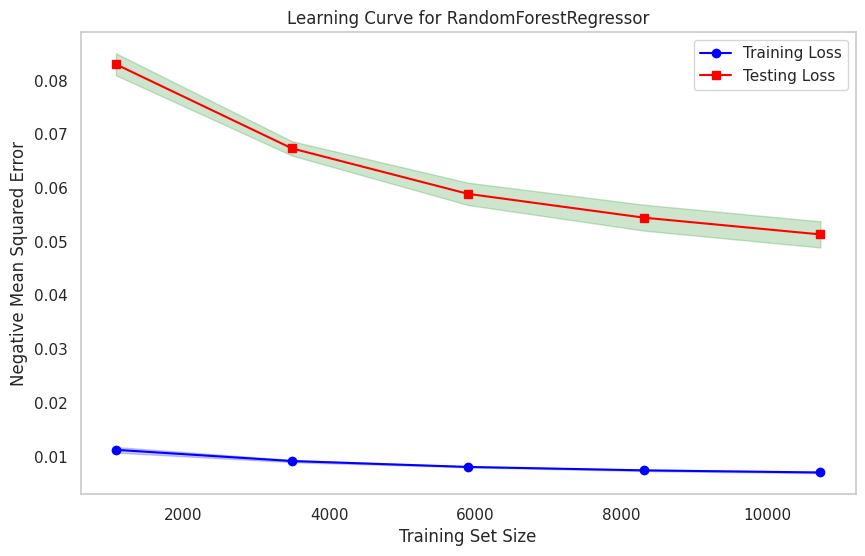

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Create a learning curve for the RandomForestRegressor model
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(), X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Loss', color='red', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.title('Learning Curve for RandomForestRegressor')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()


### random forest parameter grid

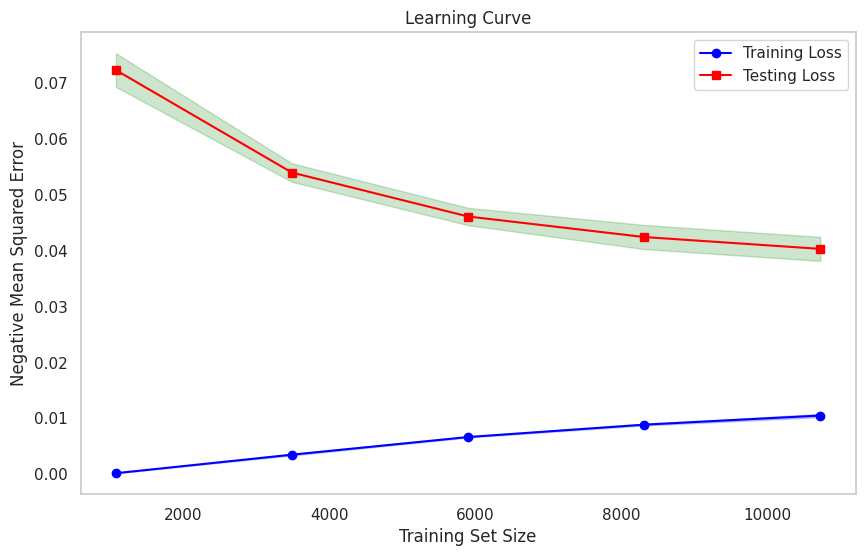

In [ ]:
from sklearn.model_selection import learning_curve

#Create a learning curve with the best model from GridSearchCV
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Loss', color='red', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

### linear regression

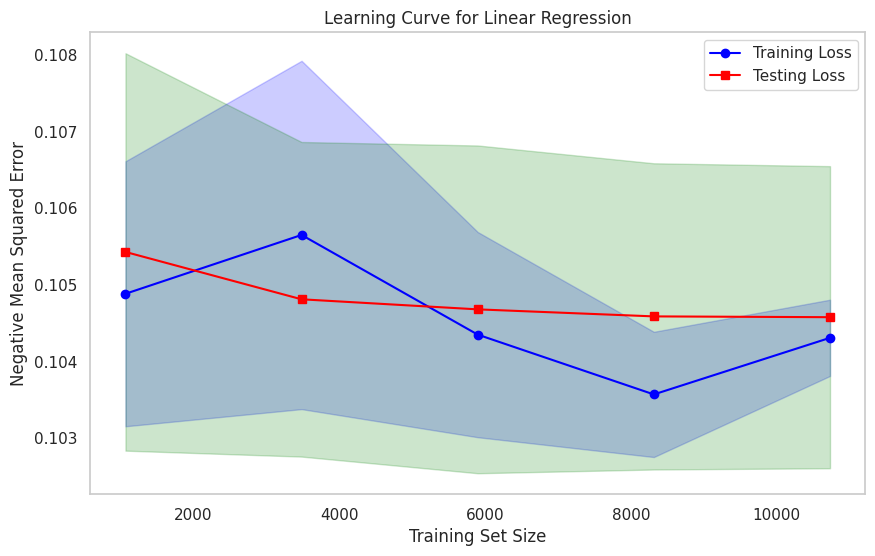

In [ ]:
# Create a learning curve for the Linear Regression model
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Loss', color='red', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.title('Learning Curve for Linear Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

### XGB

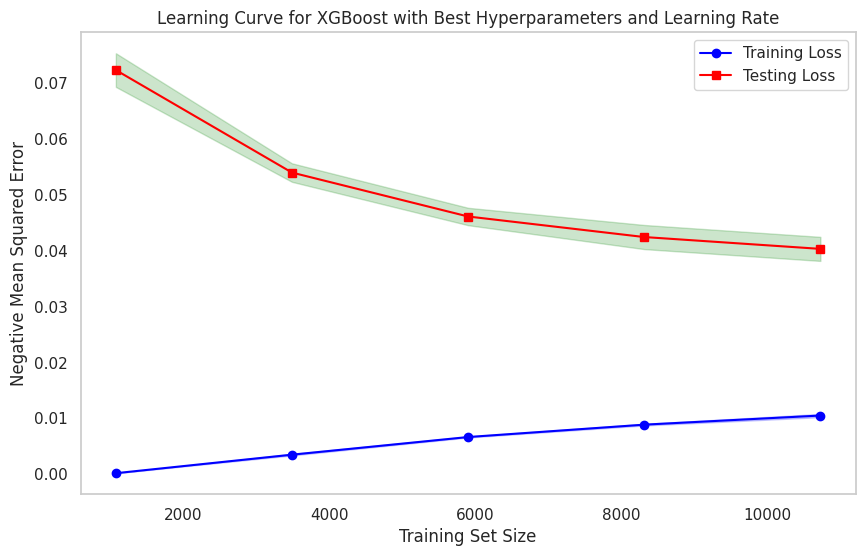

In [ ]:
# Create a learning curve with the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Loss', color='red', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.title('Learning Curve for XGBoost with Best Hyperparameters and Learning Rate')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

Decision Tree

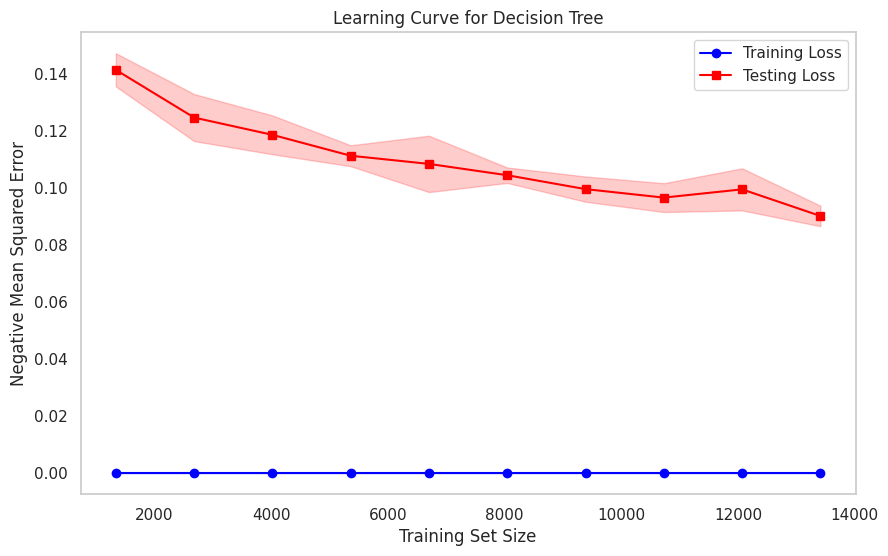

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)

# Define training sizes
train_sizes, train_scores, test_scores = learning_curve(
    decision_tree, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Loss', color='red', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Learning Curve for Decision Tree')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()


Lasso Regression

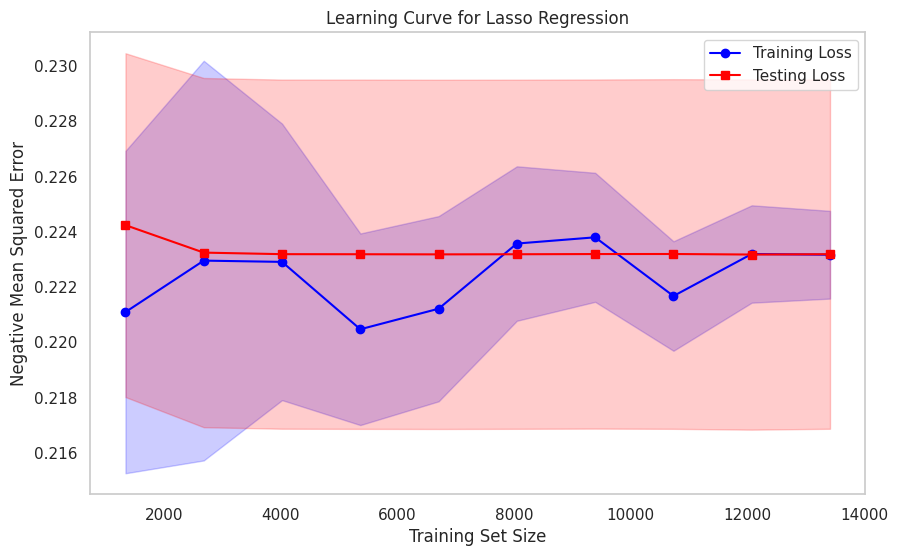

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Lasso

# Create a Lasso Regression model
lasso = Lasso(alpha=1.0, random_state=42)  # Adjust alpha if needed

# Define training sizes
train_sizes, train_scores, test_scores = learning_curve(
    lasso, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Loss', color='red', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Learning Curve for Lasso Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()
